# TABLE OF CONTENTS

* [1. Introduction](#section-one)
* [2. Setup](#section-two)
    - [2.1 Import Packages](#subsection-two-one)
    - [2.2 Import and Wrangle Data](#subsection-two-two)
* [3. Global COVID-19 Situation](#section-three)
    - [3.1 Global COVID-19 Accumulation](#subsection-three-one)
    - [3.2 Global COVID-19 Epi-Center Shifting and Progression Graph](#subsection-three-two)
    - [3.3 Global COVID-19 Infection and Death Rate](#subsection-three-three)
    - [3.4 Global COVID-19 Situation Driving Factors](#subsection-three-four)
    - [3.5 Global COVID-19 Situation Prediction](#subsection-three-five)
* [4. Singapore Covid19 Situation](#section-four)
    - [4.1 Singapore COVID-19 Accumulation](#subsection-four-one)
    - [4.2 Singapore COVID-19 Infection and Death Rate](#subsection-four-two)
    - [4.3 Singapore COVID-19 Situation Prediction](#subsection-four-three)
* [5. Market Situation](#section-five)
    - [5.1 Global Market Situation](#subsection-five-one)
      - [5.1.1 General Market Situation and Correlation](#subsection-five-one-one)
      - [5.2.2 S&P as General Market and Behaviours](#subsection-five-two-two)
    - [5.2 Singapore Market Situation](#subsection-five-two)
    - [5.3 Explainations on Market Behaviours](#subsection-five-three)
* [6. Portfolio Historical Performance](#section-six)
    - [6.1 Global Diversified Portfolio and Performance](#subsection-six-one)
    - [6.2 Concentration Portfolio and Performance](#subsection-six-two)
* [7. Portfolio Allocation in Future](#section-six)
* [8. Conclusion](#section-eight)
* [Reference](#section-nine)




<a id="section-one"></a>
# 1. Introduction

COVID-19 hits the market in 2020. With no knowlege and no experience on this kind of crisis, we try to apply the data analytics methods to solve the real world problem by looking into (assume today is 31st Oct 2020):
- Global and Local COVID-19 Situation in Singapore
- Market Situation Globally and Locally
- Historical Outperforming Portfolio and Reasons
- Suggestions of Future Portfolio Allocation and Reasons

<a id="section-two"></a>
# 2. Setup

Please make the following things ready for usage:
1. Settings -> Environment -> "Always use latest environment"
2. Settings -> Internet -> "On"
3. Track Changes Adding Commons "###:CHANGED: ....... "

<a id="subsection-two-one"></a>
## 2.1 Import Packages

In [ ]:
# Data Management
import datetime as dt
from dateutil import relativedelta as rd
from datetime import datetime, date, timedelta
import pandas as pd
import numpy as np
from numpy import inf
from scipy.stats.mstats import winsorize

# Visualization
import matplotlib.pyplot as plt
import plotly as py
import plotly.offline as pyo
pyo.init_notebook_mode()
import seaborn as sns; sns.set()

# interactive visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Regression 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.graphics.api as smg
from scipy.stats import t
from scipy.stats import chi2_contingency

!pip install yfinance
# !pip install fix-yahoo-finance
import yfinance as yf

# for offline ploting, must turn this plotly.offline on
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# to interface with operating system
import os

# for trendlines
import statsmodels

# Defind Color Scheme
# color pallette
# Hexademical code RRGGBB (True Black #000000, True White #ffffff)
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

<a id="subsection-two-two"></a>
## 2.2 Import and Wrangle Data

Update Instruction:
- Historical Econ data: in INPUT1, change start and end date, otherwise auto update
- Recession data: in INPUT2, make the merged item follow the date of snp, if out of this recession, need to change dataset
- COVID data: in INPUT3, this file need to constantly update manually, not using scrabber here, from (https://ourworldindata.org/coronavirus-source-data)
- COVID data2: in INPUT4, this file need to constantly update manually, not using scrabber here, from (https://data.humdata.org/m/dataset/novel-coronavirus-2019-ncov-cases)
- Portfolio data: in INPUT5, change start and end date, otherwise auto update
- Covid data3: in INPUT6, old data for temperature and humidity testing on covid effect for early 2020s
- All input for Today can be search via ctrl+f "2020-10-31"

In [ ]:
# INPUT 1: Asset Information use Yahoo Finance (Change start and end date to auto update)

def yh_data_download (ticker,start,end):
    output = yf.download(ticker, start=start, end=end)
    return output

start = dt.datetime(1990,1,1)
end = dt.datetime(2020,10,31)

snp = yh_data_download("^GSPC",start,end) # starting from 1993
sti = yh_data_download("^STI",start,end)
gold = yh_data_download("GC=F",start,end) # starting from 2000
btc = yh_data_download("BTC-USD",start,end) # starting from 2014
high_yield_bond = yh_data_download("HYG",start,end) # starting from 2007
inv_grade_bond = yh_data_download("LQD",start,end) # starting from 2002
wti = yh_data_download("CL=F",start,end) # starting from 2000
tbill = yh_data_download("^TNX",start,end) # 10 YR
klse = yh_data_download("^KLSE",start,end) # starting from 1993, Malaysia
jkse = yh_data_download("^JKSE",start,end) # starting from 1990, Indonesia
hsi = yh_data_download("^HSI",start,end) # Hong Kong
nikkel = yh_data_download("^N225",start,end) # Japan
sse = yh_data_download("000001.SS",start,end) # starting from 1997, Shanghai Index



# tbill is different as it is on yield
tbill['1'] = 1
tbill['100'] = 100
tbill['1plus'] = tbill['1'] + tbill['Adj Close']/tbill['100']
tbill['10yr rate'] = tbill['1plus']**10
tbill['Adj Close'] = tbill['100']/(tbill['10yr rate'])
# tbill.tail(10)



series = [snp, sti, gold, btc, high_yield_bond, inv_grade_bond, wti, tbill, klse, jkse, hsi, nikkel, sse]
series_name = ['snp','sti','gold','btc','high_yield_bond','inv_grade_bond','wti',\
               'tbill','klse','jkse','hsi','nikkel','sse']
series_dict =  dict(zip(series_name, series))
# tbill.tail(10)



# wangle yf data and left only the data we want
def clean_yf_data (series_dict, df_name):
    df = series_dict[df_name]
    df.reset_index(inplace = True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.rename(columns={'Adj Close':df_name}, inplace=True)
    
    # Naming of columns
    return_name = df_name+"_return"
    volatility_1m_name = df_name+"_volatility_1m"
    volatility_1y_name = df_name+"_volatility_1y"
    forward_return_name = 'one_month_forward_'+df_name+'_return'
    lag1 = df_name+"_lag1"
    lag2 = df_name+"_lag2"
    
    # In case the missing value, shift and foreward filled
    df[lag1] = df[df_name].shift(1)
    df[lag2] = df[df_name].shift(2)
    df[df_name] = df[df_name].fillna(df[lag1])
    df[df_name] = df[df_name].fillna(df[lag2])
    df[df_name] = df[df_name].astype('float64')
    
    # Continue functions
    df[return_name] = df[df_name].pct_change()
    df[volatility_1m_name] = (df[return_name].rolling(20).std())*(20)**(1/2) # Annualize daily standard deviation
    df[volatility_1y_name] = (df[return_name].rolling(252).std())*(252)**(1/2) # 252 trading days per year
    df = df[['Date',df_name,return_name,volatility_1m_name,volatility_1y_name]]
    df[forward_return_name] = df[return_name][::-1].rolling(window=20, min_periods=1).sum()[::-1] # Calculate 1-month forward cumulative returns
    return df


# calling necessary ones (be careful of missing data in the future, so put the 2 forward fill item in the function)
snp = clean_yf_data(series_dict,'snp')
sti = clean_yf_data(series_dict,'sti')
gold = clean_yf_data(series_dict,'gold')
btc = clean_yf_data(series_dict,'btc')
high_yield_bond = clean_yf_data(series_dict,'high_yield_bond')
inv_grade_bond = clean_yf_data(series_dict,'inv_grade_bond')
wti = clean_yf_data(series_dict,'wti')
tbill = clean_yf_data(series_dict,'tbill')
klse = clean_yf_data(series_dict,'klse')
jkse = clean_yf_data(series_dict,'jkse')
hsi = clean_yf_data(series_dict,'hsi')
nikkel = clean_yf_data(series_dict,'nikkel')
sse = clean_yf_data(series_dict,'sse')


In [ ]:
# INPUT 2: boolean type recession indicator here (assume Mar until now is recession)
# Import datasets with Pandas method read_csv
nber_recession_indicator_month = pd.read_csv('../input/nber-based-recession-indicators-united-states/USRECM.csv')
nber_recession_indicator_day = pd.read_csv('../input/nber-based-recession-indicators-united-states/USRECD.csv')

# Convert data types
nber_recession_indicator_day["Date"] = pd.to_datetime(nber_recession_indicator_day["date"])
nber_recession_indicator_day["recession"] = nber_recession_indicator_day["value"].astype('bool')

# Subset data columns
nber_recession_indicator_day = nber_recession_indicator_day[["Date","recession"]]



# Merge datasets together (exclude snp in asset class and use baseline as merge starting point)
asset_classes = [sti, gold, btc, high_yield_bond, inv_grade_bond, wti, tbill, klse, jkse, hsi, nikkel, sse]
baseline = pd.merge(snp,nber_recession_indicator_day,how='left',left_on='Date', right_on="Date")

for asset_class in asset_classes:
    baseline = pd.merge(baseline,asset_class,how='left',left_on='Date', right_on="Date")

# Backfilling missing values,  
baseline.loc[baseline.Date >= '2020-03-01', "recession"] = 1
baseline["recession"] = baseline["recession"].fillna(0).astype(bool)


In [ ]:
# INPUT 3: COVID-19 Data
covid = pd.read_csv('../input/covidnew/owid-covid-data.csv')
covid['Date'] = pd.to_datetime(covid['date'])
covid['InfectionRate'] = covid['total_cases']/covid['population']
covid['DeathRate'] = covid['total_deaths']/covid['total_cases']
covid['TestRate'] = covid['total_tests']/covid['population']
covid['TestRate'] = covid['TestRate'].ffill() # forward filling those do not have value
# covid.info()

In [ ]:
# INPUT 4: Rocovery data
recovery = pd.read_csv('../input/recovery/time_series_covid19_recovered_global.csv')

# Gettting the country info out
recovery.drop(['Province/State',"Lat","Long"], axis=1, inplace = True)
new_rec = recovery.groupby(['Country/Region']).sum()
new_rec.reset_index(inplace = True)

# Create a world column for world statistics
new_rec.set_index("Country/Region", inplace = True)
new_rec.loc['World'] = new_rec.apply(lambda x: x.sum())
new_rec.reset_index(inplace = True)

# Getting the data into different time and date (melt)
col_list = new_rec.columns.values.tolist()
del col_list[0] # delete first col
new_rec = new_rec.melt(id_vars=['Country/Region'],value_vars=col_list)
new_rec.rename(columns={'Country/Region':'location_right'},inplace = True)
new_rec.rename(columns={'variable':'date'},inplace = True)
new_rec.rename(columns={'value':'recovery_cases'},inplace = True)
new_rec['date'] = pd.to_datetime(new_rec['date'])

# Merge with covid file
covid = pd.merge(covid, new_rec, how='left', left_on=['location','Date'], right_on = ['location_right','date'])

# Clean up to exclude world general statistic,Nov data(assumption in Oct) and Singapore_only file
world_covid = covid.loc[covid["location"]=='World'] # save for further usage
covid = covid[~covid["location"].isin(['World','International'])]
covid = covid[covid["Date"]<'2020-11-01']
covid_sg_only = covid.loc[covid["location"].isin(['Singapore'])]
# world_covid.info()
# covid_sg_only.tail(10)

# golbal data
covid['Active'] = covid['total_cases']-covid['recovery_cases']-covid['total_deaths']
global_data=covid.groupby('Date')[['total_cases','total_deaths','recovery_cases','Active','population']].sum()
global_data.rename(columns={'total_cases':'Confirmed'},inplace = True)
global_data.rename(columns={'total_deaths':'Deaths'},inplace = True)
global_data.rename(columns={'recovery_cases':'Recovered'},inplace = True)
global_data.rename(columns={'population':'Population'},inplace = True)
global_data.reset_index(inplace=True)
# global_data.tail()


In [ ]:
# INPUT 5: Stock Market Data for Concentrated Portfolio up to 31st Oct

start = dt.datetime(2020,1,1)
end = dt.datetime(2020,10,31)

topgloves = yh_data_download("TPGC.KL",start,end)
hatalega= yh_data_download("5168.KL",start,end)
kossan= yh_data_download("KRIB.KL",start,end)
scgm= yh_data_download("7247.KL",start,end)
tongguan= yh_data_download("TGIB.KL",start,end)
scientex= yh_data_download("STIK.KL",start,end)
ups= yh_data_download("UPS",start,end)
fedex= yh_data_download("FDX",start,end)
dhl= yh_data_download("DPW.DE",start,end)
sfexpress= yh_data_download("002352.SZ",start,end)
zto= yh_data_download("ZTO",start,end)
xiaomi= yh_data_download("1810.HK",start,end)
cicc= yh_data_download("3908.HK",start,end)
pingan= yh_data_download("601318.SS",start,end)
tencent= yh_data_download("0700.HK",start,end)
alibaba= yh_data_download("9988.HK",start,end)
pinduoduo= yh_data_download("PDD",start,end)
zoom= yh_data_download("ZM",start,end)
sea= yh_data_download("SE",start,end)

# Newly Added Stock:
moderna = yh_data_download("MRNA",start,end)
delta = yh_data_download("DAL",start,end)
nclh = yh_data_download("NCLH",start,end)
sinopharm = yh_data_download("1099.HK",start,end)
pfizer = yh_data_download("PFE",start,end)
cansinobio = yh_data_download("6185.HK",start,end)
foxconn = yh_data_download("2354.TW",start,end)
gs = yh_data_download("GS",start,end)
jpm = yh_data_download("JPM",start,end)

series_stk_test = [topgloves, hatalega, kossan, scgm,tongguan, scientex, ups, fedex, dhl, sfexpress, zto, xiaomi, cicc, pingan, tencent, alibaba, pinduoduo, zoom, sea]
series_name_stk_test = ['topgloves', 'hatalega', 'kossan', 'scgm','tongguan', 'scientex', 'ups', 'fedex', 'dhl', 'sfexpress',\
               'zto', 'xiaomi', 'cicc', 'pingan', 'tencent', 'alibaba', 'pinduoduo', 'zoom', 'sea']
series_dict_stk_test =  dict(zip(series_name_stk_test, series_stk_test))

# for newly added stock
new_series_stk_test = [moderna, delta, nclh, sinopharm, pfizer, cansinobio, foxconn, gs, jpm]
new_series_name_stk_test = ['moderna', 'delta', 'nclh', 'sinopharm', 'pfizer', 'cansinobio', 'foxconn', 'gs', 'jpm']
new_series_dict_stk_test =  dict(zip(new_series_name_stk_test, new_series_stk_test))

# can use for loop but for better showing, use it here seperatly
topgloves = clean_yf_data(series_dict_stk_test,'topgloves')
hatalega= clean_yf_data(series_dict_stk_test,'hatalega')
kossan= clean_yf_data(series_dict_stk_test,'kossan')
scgm= clean_yf_data(series_dict_stk_test,'scgm')
tongguan= clean_yf_data(series_dict_stk_test,'tongguan')
scientex= clean_yf_data(series_dict_stk_test,'scientex')
ups= clean_yf_data(series_dict_stk_test,'ups')
fedex= clean_yf_data(series_dict_stk_test,'fedex')
dhl= clean_yf_data(series_dict_stk_test,'dhl')
sfexpress= clean_yf_data(series_dict_stk_test,'sfexpress')
zto= clean_yf_data(series_dict_stk_test,'zto')
xiaomi= clean_yf_data(series_dict_stk_test,'xiaomi')
cicc= clean_yf_data(series_dict_stk_test,'cicc')
pingan= clean_yf_data(series_dict_stk_test,'pingan')
tencent= clean_yf_data(series_dict_stk_test,'tencent')
alibaba= clean_yf_data(series_dict_stk_test,'alibaba')
pinduoduo= clean_yf_data(series_dict_stk_test,'pinduoduo')
zoom= clean_yf_data(series_dict_stk_test,'zoom')
sea= clean_yf_data(series_dict_stk_test,'sea')

# loop for the new added stock
moderna = clean_yf_data(new_series_dict_stk_test,'moderna')
delta = clean_yf_data(new_series_dict_stk_test,'delta')
nclh = clean_yf_data(new_series_dict_stk_test,'nclh')
sinopharm = clean_yf_data(new_series_dict_stk_test,'sinopharm')
pfizer = clean_yf_data(new_series_dict_stk_test,'pfizer')
cansinobio = clean_yf_data(new_series_dict_stk_test,'cansinobio')
foxconn = clean_yf_data(new_series_dict_stk_test,'foxconn')
gs = clean_yf_data(new_series_dict_stk_test,'gs')
jpm = clean_yf_data(new_series_dict_stk_test,'jpm')

In [ ]:
# INPUT 6: Worldometer and covid 19 files input just for humidity and temperature testing purpose
# Read and rename column country
cty_info = pd.read_csv('../input/countryinfo/covid19countryinfo.csv').rename(columns={'country':'Country'})

# Filter observations with aggregate country-level information
# The column region for region-level observations is populated
cty_info = cty_info[cty_info.region.isnull()]
    
# Filter columns of interest
# Note: feel free to explore other variables or datasets
cty_info = cty_info[['Country','avghumidity', 'avgtemp', 'fertility', 'medianage', 'urbanpop', 'quarantine', 'schools', \
                    'publicplace', 'gatheringlimit', 'gathering', 'nonessential', 'hospibed', 'smokers', \
                    'sex0', 'sex14', 'sex25', 'sex54', 'sex64', 'sex65plus', 'sexratio', 'lung', 'femalelung', \
                    'malelung', 'gdp2019', 'healthexp', 'healthperpop']]




worldometer_data = pd.read_csv('../input/corona-virus-report/worldometer_data.csv')

# Replace missing values '' with NAN and then 0
worldometer_data = worldometer_data.replace('', np.nan).fillna(0)

# Population Structure
worldometer_pop_struc = pd.read_csv('../input/covid19-worldometer-snapshots-since-april-18/population_structure_by_age_per_contry.csv')

# Replace missing values with zeros
worldometer_pop_struc = worldometer_pop_struc.fillna(0)

# Merge datasets by common key country
worldometer_data = worldometer_data.merge(worldometer_pop_struc,how='inner',left_on='Country/Region', right_on='Country')
worldometer_data = worldometer_data[worldometer_data["Country/Region"] != 0]

### PBS_3: ADDING: merge one more item and replace the item below (below all adding)
# Country information
worldometer_data = worldometer_data.merge(cty_info, how='left', on='Country')

### PBS_3: ADDING: merge one more item and replace the item below (below all adding)
# Replace space in variable names with '_'
worldometer_data.columns = worldometer_data.columns.str.replace(' ', '_')




full_grouped = pd.read_csv('../input/corona-virus-report/full_grouped.csv')
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])

# Correct country names in worldometer to make them consistent with dataframe full_grouped column Country/Region before merging 
worldometer_data['Country/Region'].replace({'USA':'US', 'UAE':'United Arab Emirates', 'S. Korea':'South Korea', \
                                           'UK':'United Kingdom'}, inplace=True)

# Draw population and country-level data
full_grouped = full_grouped.merge(worldometer_data[['Country/Region', 'Population']], how='left', on='Country/Region')
full_grouped = full_grouped.merge(cty_info, how = 'left', left_on = 'Country/Region', right_on = 'Country')
full_grouped['Confirmed per 1000'] = full_grouped['Confirmed'] / full_grouped['Population'] * 1000

# Backfill data
full_grouped = full_grouped.fillna(method='ffill')

# Replace space in variable names with '_'
full_grouped.columns = full_grouped.columns.str.replace(' ', '_')


<a id="section-three"></a>
# 3. Global COVID-19 Situation

<a id="subsection-three-one"></a>
## 3.1 Global Covid-19 Accumulation

In [ ]:
# Plot world general graph
g = sns.relplot(x="Date", y="new_cases", kind="line", data=world_covid)
g.fig.autofmt_xdate()

In [ ]:
# Plot accumulation graph
def global_accumulation (df,col):
    fig = px.bar(df, x="Date", y=col, color='location', 
                 height=600, title=col, color_discrete_sequence = px.colors.cyclical.mygbm)
    fig.update_layout(showlegend=True)
    fig.show()

global_accumulation(covid,'total_cases')

In [ ]:
# Plot a map to visulised the case situation
covid_today_master = covid[covid['Date']=="2020-10-31"]
def plot_map(df, col, pal):
    df = df[df[col]>0]
    
    # choropleth draws maps based on shape files of different countries
    fig = px.choropleth(df, locations="location", locationmode='country names', 
                  color=col, hover_name="location", 
                  title=col, hover_data=[col], color_continuous_scale=pal)
    # 1:50m resolution
    fig.update_geos (resolution=50)
    fig.show()

plot_map(covid_today_master, 'total_cases', 'matter') # Total number spread around the world
plot_map(covid_today_master, 'total_cases_per_million', 'matter') # Total number that over 1 million population

The output shows in Oct 31st, global situation is not optimal and infected cases is still under explosive growth

<a id="subsection-three-two"></a>
## 3.2 Global COVID-19 Epi-Center Shifting and Progression Graph

In [ ]:
# Try to create a % wise country case chart, merge helps the percentage calculation
world_covid_epi = world_covid[['Date','total_cases']]
world_covid_epi = world_covid_epi.rename(columns={'total_cases':"world_total_cases"})
covid_epi = covid[['Date', 'location', 'total_cases']]
covid_epi = pd.merge(covid_epi[['Date', 'location', 'total_cases']], 
                world_covid_epi[['Date', 'world_total_cases']], on='Date', how = 'left')
covid_epi['% Confirmed of Global'] = round(covid_epi['total_cases']/covid_epi['world_total_cases'], 3)*100

def global_epi_centre(df): # change here as there is no feed in df, writing temp very confusing
    fig = px.bar(df, x='Date', y="% Confirmed of Global", color='location', 
             range_y=(0, 100), title='% of Confirmed Cases from each country', 
             color_discrete_sequence=px.colors.qualitative.Prism)
    fig.show()
    
global_epi_centre(covid_epi)




In [ ]:
# Plot log(Confirmed Cases) for each Country/Region(location) Over time
fig = px.choropleth(covid, locations="location", 
                    color=np.log(covid["total_cases"]),
                    locationmode='country names', hover_name="location", 
                    animation_frame=covid["Date"].dt.strftime('%Y-%m-%d'),
                    title='Cases over time', color_continuous_scale=px.colors.sequential.matter)
fig.update(layout_coloraxis_showscale=False)
fig.update_geos (resolution=50)
fig.show()

Epi-center shift from China to US, India and Brazil (And also other Latin America Countries), globally under following senarios but depends on regions.

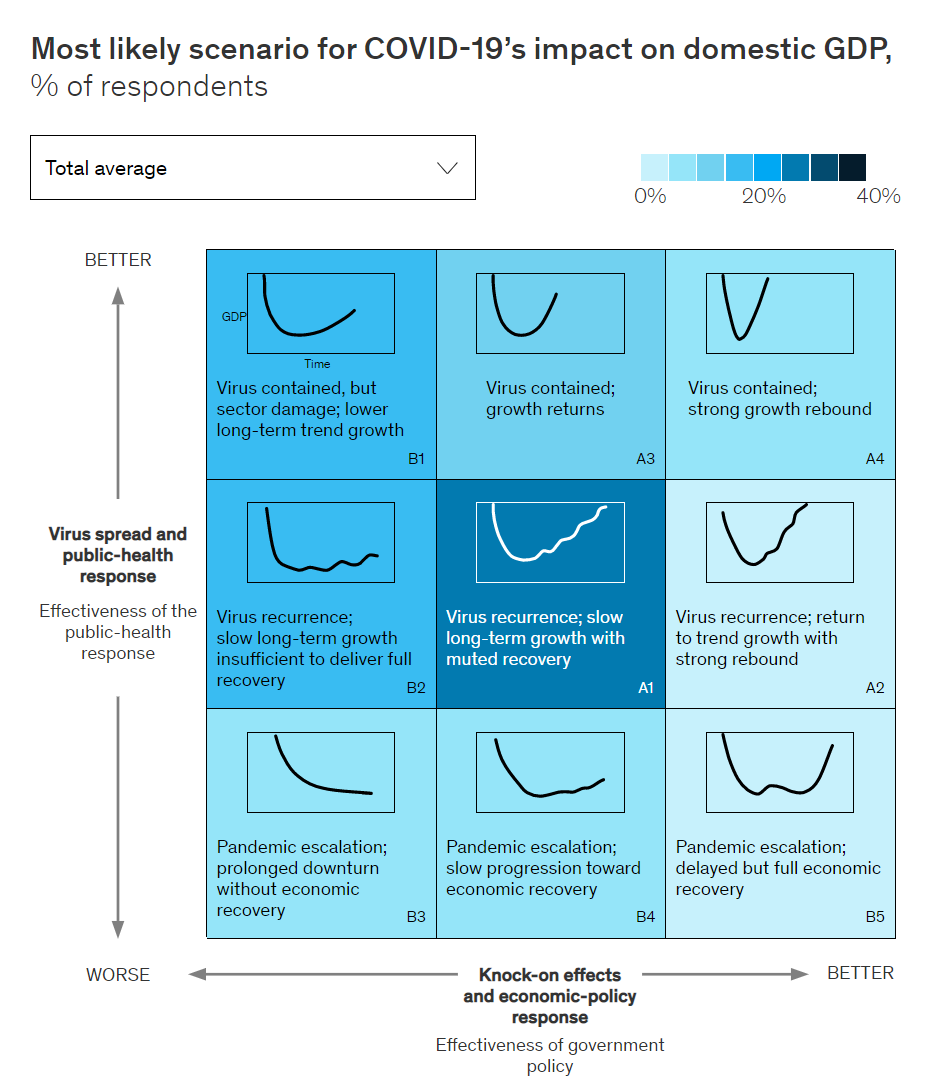

<a id="subsection-three-three"></a>
## 3.3 Global COVID-19 Infection and Death Rate

In [ ]:
# Use data to see the graph of test rate
covid_today = covid_today_master[['Date','location','TestRate','InfectionRate','DeathRate','total_cases','continent']]
covid_today.dropna(inplace=True)
fig = px.scatter(covid_today,x='location', y='TestRate',size='total_cases',color='continent',color_discrete_sequence = px.colors.qualitative.Dark2)
fig.update_layout(title='Test Rate', xaxis_title="", yaxis_title="TestRate",xaxis_categoryorder = 'total ascending',
                  uniformtext_minsize=8, uniformtext_mode='hide',xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
fig = px.scatter(covid_today,x='location', y='InfectionRate',size='total_cases',color='continent',color_discrete_sequence = px.colors.qualitative.Dark2)
fig.update_layout(title='Infection Rate', xaxis_title="", yaxis_title="InfectionRate",xaxis_categoryorder = 'total ascending',
                  uniformtext_minsize=8, uniformtext_mode='hide',xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
fig = px.scatter(covid_today,x='location', y='DeathRate',size='total_cases',color='continent',color_discrete_sequence = px.colors.qualitative.Dark2)
fig.update_layout(title='Death Rate', xaxis_title="", yaxis_title="DeathRate",xaxis_categoryorder = 'total ascending',
                  uniformtext_minsize=8, uniformtext_mode='hide',xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
infection_world = world_covid[world_covid["Date"]=="2020-10-31"]
infection_world.set_index("Date", inplace = True)
print("Infection Rate is "+str(round(infection_world.loc["2020-10-31","InfectionRate"]*100,2))+"%")
print("Death Rate is "+str(round(infection_world.loc["2020-10-31","DeathRate"]*100,2))+"%")
print("Test Rate is "+str(round(infection_world.loc["2020-10-31","TestRate"]*100,2))+"%")

<a id="subsection-three-four"></a>
## 3.4 Global COVID-19 Situation Driving Factors

In [ ]:
# No humidity and temperature data on providing dataset, therefore, we are using old covid dataset only for this
full_grouped['log_Confirmed_per_1000'] = np.log(full_grouped['Confirmed_per_1000']+1) # avoid 0

#Plot pairplot with countries organized by WHO regions, show if anything matters
g = sns.pairplot(full_grouped[["log_Confirmed_per_1000", 'avghumidity', 'avgtemp', 'urbanpop', "WHO_Region"]], hue="WHO_Region")


In [ ]:
# Test on factors that might drive up the death rate
covid_today_death = covid_today_master[["total_deaths", "human_development_index", "aged_65_older",'cardiovasc_death_rate',\
                                'diabetes_prevalence','hospital_beds_per_thousand',"continent"]]
covid_today_death.dropna(subset=["total_deaths"],inplace = True) # avoid 0

g = sns.pairplot(covid_today_death[["total_deaths", "human_development_index", "aged_65_older",\
                                    'cardiovasc_death_rate','diabetes_prevalence','hospital_beds_per_thousand',\
                                    "continent"]], hue="continent")

We could observe that temperature and humidity at proper rate, the spreading is faster.

Besides, more hospital beds or less aged personals have lesser death number (exclude the outliers)

<a id="subsection-three-five"></a>
## 3.5 Global COVID-19 Situation Prediction

It's very hard to predict what will happening, so what we do is to just use the old dataset containing recovery personals to predict if the explosion continues without controlled what will happened 

In [ ]:
# Draft a graph that allow us to see what is the starting date of the wave
def plot_world(global_data, date): # input the global data as dataframe
    temp = global_data[:]
    temp['recent_wave'] = np.where(temp['Date'] >= date,1,0)

    fig = px.line(temp, x='Date', y='Confirmed', color='recent_wave', \
                  title = 'Infections (World)', height=600)      
    fig.show()
    
    fig = px.line(temp, x='Date', y='Recovered', color='recent_wave', \
              title = 'Recovered Patients (World) ', height=600)      
    fig.show()
    
    return date

date = plot_world(global_data, '2020-03-20')

Model:  
\begin{align*}
\mathrm{S} \overset{\beta I}{\longrightarrow} \mathrm{I} \overset{\gamma}{\longrightarrow} \mathrm{R}  \\
\end{align*}

$\beta$: Effective contact rate or transmission rate [per day basis]  
$\gamma$: Recovery(and mortality) rate [per day basis]  

Ordinary Differential Equation (ODE):  
\begin{align*}
& \frac{\mathrm{d}S}{\mathrm{d}T}= - \beta S I / N \\
& \frac{\mathrm{d}I}{\mathrm{d}T}= \beta S I / N - \gamma I  \\
& \frac{\mathrm{d}R}{\mathrm{d}T}= \gamma I  \\
\end{align*}

Where $N=S+I+R$ is the total population, $T$ is the elapsed time from the start date.

In [ ]:
# SIR model for future usage
def SIRMODEL (population, time_series_length, df):
    # Initialize Numpy arrays for total population (the maximum population), 
    # susceptible population (empty), and change in time (i.e., 1 day)
    N  = np.array([population] * time_series_length)
    S  = np.array([])
    dt = np.array([1] * (time_series_length-1))

    # Apply the condition N = S+I+(R+D)
    # Filter time-series to those of the recent wave
    I = np.array(df[df['recent_wave']==1]['Active'])
    R = np.array(df[df['recent_wave']==1]['Recovered'])
    D = np.array(df[df['recent_wave']==1]['Deaths'])

    # R includes both Recovered and Death for brevity
    S = N - I - (R + D)

    ## 1. Estimate beta
    
    x = (S * I) / N
    
    # Copy all elements except the last
    x = x[:-1].copy()
    
    # Take the first difference
    dS = np.diff(S)
    y = dS/dt

    # Fit into a linear regression
    results = sm.OLS(y, x, missing='drop').fit()
    beta = results.params
    print(results.summary())
    print('\n')
    print('*'*80)
    print(f"Transmission rate or Beta is: {beta}")
    print('*'*80)
    
    ## 2. Estimate gamma
    
    x = I[:-1].copy()
    dR = np.diff(R+D)
    y = dR/dt

    results = sm.OLS(endog=y, exog=x, missing='drop').fit()
    gamma = results.params
    print (results.summary())
    print('\n')
    print('*'*80)
    print(f"Recovery (and Mortality) rate or Gamma is: {gamma}")
    print('*'*80)
    
    #3. Calculate R

    print('\n')
    print('*'*80)
    print(f"Reproduction number or R is: {-beta/gamma}")
    print('*'*80)
    
    return -beta.astype('float'), gamma.astype('float'), datetime.strptime(date,'%Y-%m-%d').date()


# Draft a graph that allow us to see the SIR model for global
def estimate_global_sir_param(global_data, date): # calling using global data
    
    # Assume everyone is at risk
    # Identify the maximum population and the latest date in the time series for the country
    population  = global_data["Population"].max()
    latest_date = global_data["Date"].max()
    
    time_series_length = (latest_date - datetime.strptime(date,'%Y-%m-%d')).days + 1

    temp = global_data[:]
    temp['recent_wave'] = np.where(temp['Date'] >= date,1,0)
    
    beta, gamma, date = SIRMODEL (population, time_series_length, temp)
    
    return beta, gamma, date

beta, gamma, date = estimate_global_sir_param(global_data, '2020-03-20')

In [ ]:
# Estimate how much of the population will be infected if no measure takened

def sir_model(I0=0.01, beta=0.6, gamma=0.1, days=365, date=date.today()):
    """
    Function will take in initial state for infected population,
    Transmission rate (beta) and recovery rate(gamma) as input.
    
    The function returns the maximum percentage of infectious population,
    the number of days to reach the maximum (inflection point),
    the maximum percentage of population infected,
    the number of days to reach 80% of the maximum percentage of population infected.
    
    """
    ## Initialize model parameters
    N = 1          #Total population in percentage, i.e., 1 = 100%
    I = I0         #Initial state of I default value 1% of population, i.e., I0 = 0.01
    S = N - I      #Initial state of S
    R = 0          #Initial State of R
    C = I          #Initial State of Total Cases
    beta  = beta   #Transmission Rate
    gamma = gamma  #Recovery Rate

    ## Initialize empty lists
    inf  = []       # List of Infectious population for each day
    day  = []       # Time period in day
    suc  = []       # List of Susceptible population for each day
    rec  = []       # List of Recovered population for each day
    conf = []       # List of Total Cases population for each day
    
    ## Project into the future
    for i in range(days):
        day.append(i)
        inf.append(I)
        suc.append(S)
        rec.append(R)
        conf.append(C)

        new_inf= I*S*beta/N            #New infections equation (1)   
        new_rec= I*gamma               #New Recoveries equation (2)
        
        I=I+new_inf-new_rec            #Total infectious population for next day
        S=max(min(S - new_inf, N), 0)  #Total infectious population for next day
        R=min(R + new_rec, N)          #Total recovered population for next day
        
        C=C+new_inf                    #Total confirmed cases for next day

    ## Pinpoint important milestones    
    max_inf = round(np.array(inf).max()*100,2)        #Peak infectious population in percentage
    inflection_day = inf.index(np.array(inf).max())   #Peak infectious population in days
    max_conf = round(np.array(conf).max()*100,2)      #Overall infected population in percentage
    plateau_day = np.array(np.where(np.array(conf) >= 0.8*np.array(conf).max())).min()   #Peak infectious population in days
        
    print(f"Maximum Infectious population at a time :{max_inf}%")
    print(f"Number of Days to Reach Maximum Infectious Population (Inflection Point):{inflection_day} days or {date + timedelta(days=inflection_day)}")
    print(f"Total Infected population :{max_conf}%")
    print(f"Number of Days to Reach 80% of the Projected Confirmed Cases (Plateau Point):{plateau_day} days or {date + timedelta(days=plateau_day.item())}")

    ## Visualize the model outputs
    sns.set(style="darkgrid")
    plt.figure(figsize=(10,6))
    plt.title(f"SIR Model: R = {round(beta/gamma,2)}", fontsize=18)
    sns.lineplot(day,inf, label="Infectious")
    sns.lineplot(day,suc,label="Succeptible")
    sns.lineplot(day,rec, label="Recovered")
    
    plt.legend()
    plt.xlabel("Time (in days)")
    plt.ylabel("Fraction of Population")
    plt.show()
    
    
# calculate from 20th Mar, parameter using the parameter from global SIR result
sir_model(I0=0.001042, beta = 0.0536307, gamma = 0.0411475, days=1000, date = date)

<a id="section-four"></a>
# 4. Singapore COVID-19 Situation

<a id="subsection-four-one"></a>
## 4.1 Singapore COVID-19 Accumulation

In [ ]:
# Collapse Country, Date observations to Date observations and reindex
# Similar to world chart, can wtire a function to do this and just call, but notebook not scrip so make it clear, write it out
covid_sg_only['Active'] = covid_sg_only['total_cases']-covid_sg_only["recovery_cases"]-covid_sg_only['total_deaths']
active_singapore_trend = covid_sg_only.groupby('Date')['recovery_cases', 'total_deaths', 'Active'].sum().reset_index()

# Melt the data by the value_vars, bascially keep the date and make status as one column, cases become another column
active_singapore_trend = active_singapore_trend.melt(id_vars="Date", value_vars=['total_deaths', 'Active', 'recovery_cases'],
                 var_name='Case', value_name='Count')

# Plot the general chart in the ways that as time goes by, what is the case situation
fig = px.area(active_singapore_trend, x="Date", y="Count", color='Case', height=600, width=700,
             title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
# New Cases Graph
singapore_diff_case = covid_sg_only.melt(id_vars="Date", value_vars=['new_deaths', 'new_cases'],
                 var_name='Case', value_name='Count')

fig = px.area(singapore_diff_case, x="Date", y="Count", color='Case', height=600, width=800,
             title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

As we observed, Singapore cases is almost settled to zero and condition is well-contained

<a id="subsection-four-two"></a>
## 4.2 Singapore COVID-19 Infection and Death Rate

In [ ]:
infection_sg = covid_sg_only[covid_sg_only["Date"]=="2020-10-31"]
infection_sg.set_index("Date", inplace = True)
print("Infection Rate in Singapore is "+str(round(infection_sg.loc["2020-10-31","InfectionRate"]*100,2))+"%")
print("Death Rate in Singapore is "+str(round(infection_sg.loc["2020-10-31","DeathRate"]*100,2))+"%")
print("Test Rate in Singapore is "+str(round(infection_sg.loc["2020-10-31","TestRate"]*100,2))+"%")

# Index+1 is the ranking
# Print test rate
covid_today.sort_values('TestRate',ascending=False,inplace=True)
covid_today.reset_index(drop=True,inplace=True)
print(covid_today.loc[covid_today['location'] == 'Singapore'])
# Print infection rate
covid_today.sort_values('InfectionRate',ascending=False,inplace=True)
covid_today.reset_index(drop=True,inplace=True)
print(covid_today.loc[covid_today['location'] == 'Singapore'])
# Print death rate
covid_today.sort_values('DeathRate',ascending=False,inplace=True)
covid_today.reset_index(drop=True,inplace=True)
print(covid_today.loc[covid_today['location'] == 'Singapore'])


Singapore performs very well in testing and controlling the death rate although the infection rate is high.

<a id="subsection-four-three"></a>
## 4.3 Singapore COVID-19 Situation Prediction

In [ ]:
def plot_country(covid, country, date):  # bring in covid dataframe
    temp = covid[covid['location']==country]
    temp['recent_wave'] = np.where(temp['Date'] >= date,1,0)

    fig = px.line(temp, x='Date', y='total_cases', color='recent_wave', \
                  title = 'Infections for ' + str(country), height=600)      
    fig.show()
    
    fig = px.line(temp, x='Date', y='recovery_cases', color='recent_wave', \
              title = 'Recovered Patients ' + str(country), height=600)      
    fig.show()
    
    return country, date

country, date = plot_country(covid,'Singapore', '2020-04-01')

In [ ]:
# Obtain the SIR value for the specific countries

def estimate_sir_param(covid, country, date): # import covid as the dataframe
    
    # Assume everyone is at risk
    # Identify the maximum population and the latest date in the time series for the country
    population  = covid[covid['location']==country]["population"].max()
    latest_date = covid[covid['location']==country]["Date"].max()
    

    time_series_length = (latest_date - datetime.strptime(date,'%Y-%m-%d')).days + 1

    temp = covid[covid['location']==country]
    temp['recent_wave'] = np.where(temp['Date'] >= date,1,0)
    # Add to suit all except global data input
    temp.rename(columns={'total_cases':'Confirmed'},inplace = True)
    temp.rename(columns={'total_deaths':'Deaths'},inplace = True)
    temp.rename(columns={'recovery_cases':'Recovered'},inplace = True)
    temp.rename(columns={'population':'Population'},inplace = True)
    
    beta, gamma, date = SIRMODEL (population, time_series_length, temp)
    
    return beta, gamma, date

beta, gamma, date = estimate_sir_param(covid, "Singapore", date)

In [ ]:
# calculate from 20th Mar, parameter using the parameter from Singapore SIR result
# I here is the population infected in SG at that time (20th Mar)
sir_model(I0=0.000874, beta = 0.04035935, gamma = 0.04098711, days=1000, date = date) 

Singapore under the following senarios which is well contained but instead of similar to China, more towards the B1 situation, better than other countries but worse than China as it's nature of globally linked economy:
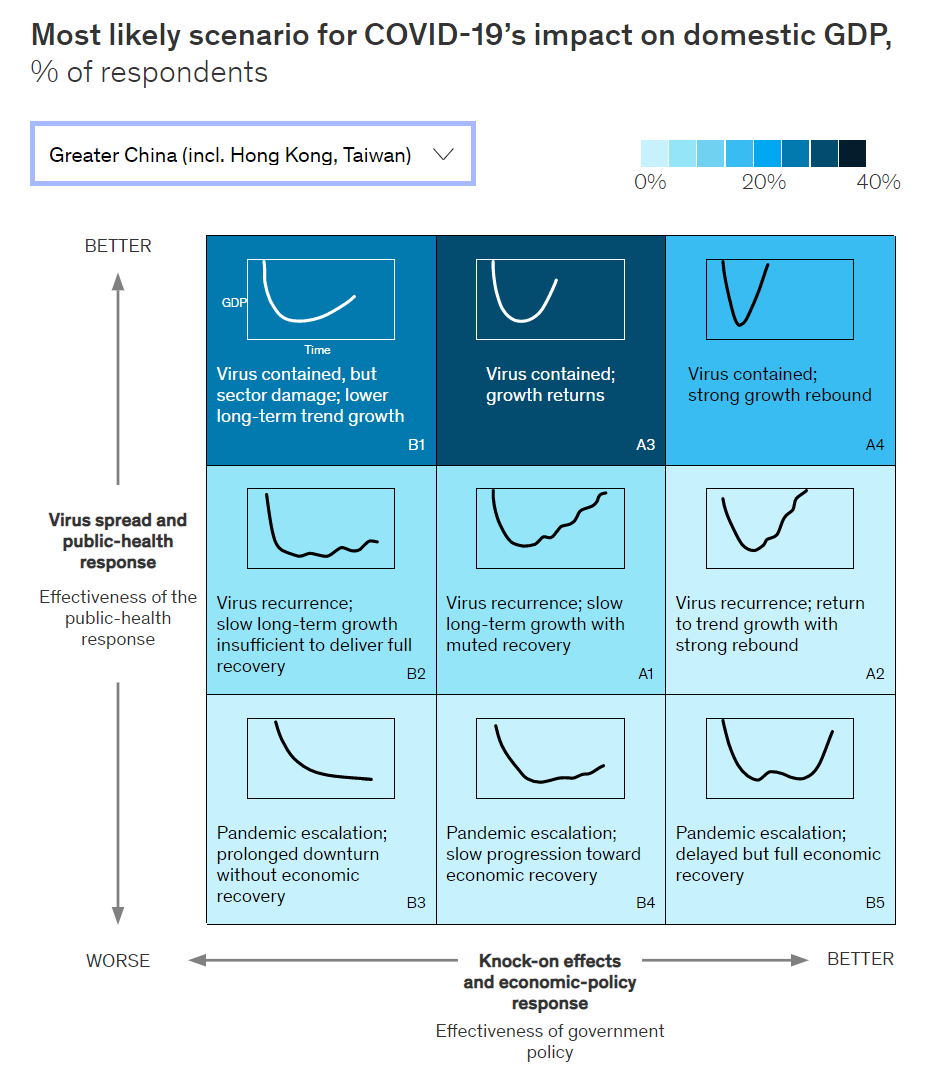

<a id="section-five"></a>
# 5. Market Situation

<a id="subsection-five-one"></a>
## 5.1 Global Market Situation

<a id="subsection-five-one-one"></a>
### 5.1.1 General Market Situation and Correlation

In [ ]:
# Make sense of the global market data, mean, std etc
baseline.describe()

In [ ]:
# Plot the time series of all key assets, as % of return from 2005 onwards (exclude btc, it's out of the range)
def rolling_pct_return (df,start_date,col_name):
    df['index_date'] = df['Date']
    df['index_date'] = pd.to_datetime(df['index_date'])
    df.set_index("index_date", inplace = True)
    df['starting_point'] = df.loc[start_date,col_name]
    df['rolling_pct_change'] = df[col_name]/df['starting_point']
    df.reset_index(inplace = True)
    return df

# Sometimes shows error becasue it's weekend, so start date is a note here
snp = rolling_pct_return(snp,'2005-01-04',"snp") 
sti = rolling_pct_return(sti,'2005-01-04',"sti") 
gold = rolling_pct_return(gold,'2005-01-04',"gold")
high_yield_bond =rolling_pct_return(high_yield_bond,'2008-01-04',"high_yield_bond")
inv_grade_bond = rolling_pct_return(inv_grade_bond,'2005-01-04',"inv_grade_bond")
wti = rolling_pct_return(wti,'2005-01-04',"wti")
tbill = rolling_pct_return(tbill,'2005-01-04',"tbill")
klse = rolling_pct_return(klse,'2005-01-04',"klse")
jkse = rolling_pct_return(jkse,'2005-01-04',"jkse")
hsi = rolling_pct_return(hsi,'2005-01-04',"hsi")
nikkel = rolling_pct_return(nikkel,'2005-01-04',"nikkel")
sse = rolling_pct_return(sse,'2005-01-04',"sse")


fig, ax = plt.subplots(figsize=(10,6))

ax.plot_date(snp['Date'], snp["rolling_pct_change"], color="blue", label="snp", linestyle="-",marker = "")
ax.plot_date(sti['Date'], sti["rolling_pct_change"], color="red", label="sti", linestyle="-",marker = "")
ax.plot_date(gold['Date'], gold["rolling_pct_change"], color="yellow", label="gold", linestyle="-",marker = "")
ax.plot_date(high_yield_bond['Date'], high_yield_bond["rolling_pct_change"], color="grey", label="high_yield_bond", linestyle="-",marker = "")
ax.plot_date(inv_grade_bond['Date'], inv_grade_bond["rolling_pct_change"], color="dimgrey", label="inv_grade_bond", linestyle="-",marker = "")
ax.plot_date(wti['Date'], wti["rolling_pct_change"], color="black", label="wti", linestyle="-",marker = "")
ax.plot_date(tbill['Date'], tbill["rolling_pct_change"], color="silver", label="tbill", linestyle="-",marker = "")
ax.plot_date(klse['Date'], klse["rolling_pct_change"], color="lime", label="klse", linestyle="-",marker = "")
ax.plot_date(jkse['Date'], jkse["rolling_pct_change"], color="seagreen", label="jkse", linestyle="-",marker = "")
ax.plot_date(hsi['Date'], hsi["rolling_pct_change"], color="darkgreen", label="hsi", linestyle="-",marker = "")
ax.plot_date(nikkel['Date'], nikkel["rolling_pct_change"], color="mediumaquamarine", label="nikkel", linestyle="-",marker = "")
ax.plot_date(sse['Date'], sse["rolling_pct_change"], color="aquamarine", label="sse", linestyle="-",marker = "")

ax.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
# plot correlation of return from baseline data
baseline_corr_return = baseline[["snp_return", "sti_return","gold_return","btc_return","high_yield_bond_return"\
                                 ,"inv_grade_bond_return","wti_return","tbill_return","klse_return","jkse_return",\
                                 "hsi_return","nikkel_return","sse_return"]].dropna().corr()

fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(baseline_corr_return, annot=True, ax = ax)

# plot correlation of volatility from baseline data
baseline_corr_return = baseline[["snp_volatility_1m", "sti_volatility_1m","gold_volatility_1m","btc_volatility_1m",\
                                 "high_yield_bond_volatility_1m","inv_grade_bond_volatility_1m","wti_volatility_1m",\
                                 "tbill_volatility_1m","klse_volatility_1m","jkse_volatility_1m","hsi_volatility_1m",\
                                 "nikkel_volatility_1m","sse_volatility_1m"]].dropna().corr()

fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(baseline_corr_return, annot=True, ax = ax)


In [ ]:
# looking at general market, what is the move that under global recession, we assume snp as general market
def plot_chart(baseline,series):
    fig = px.scatter(baseline[baseline[series].notnull()], x="Date", y=series, color="recession", color_discrete_sequence=['#636EFA', '#FFA15A'], width=1200)
    fig.update_traces(mode='markers', marker_size=4)
    fig.update_layout(title=series, xaxis_title="", yaxis_title="")
    fig.show()

plot_chart(baseline,"snp")

We are able to observed:
- Today the snp has already rebounce from the March low, however,it might drop again as 2nd close down approached
- T-bill is typical hedge tools for returns
- Return wise, Asian market are highly correlated
- BTC volatility is the best hedging tool for volatility
- Volatility wise, nearly all market's volatility is highly correlated (global market)
- Recession does not means the stock price will only going down

<a id="subsection-five-one-two"></a>
### 5.1.2 S&P as General Market and Behaviours

In [ ]:
# Use snp as an example of equally investment on index (Brandywine invest in US stock market)
# Calculate the negative runs in the STI (i.e., from one peak to another)
# Initialize an empty list for cumulative returns from one peak to another 
snp['daily_return'] = snp['snp']/snp['snp'].shift(1) - 1
# Analysis post 1995 (i.e., 1995 Nov onwards)
snp['cum_return'] = np.cumprod(snp['daily_return']+1)

snp_1995 = snp
snp_1995 = snp[snp['Date']>="1995-01-01"]

def neg_run_func(stock_ret):
    neg_run = []

    # Store the previous maximum cumulative return
    max_cum_ret_now = stock_ret['cum_return'].iloc[0]   

    # enumerate() method adds counter (t) to an iterable (stock_ret['mth_return']) and 
    # returns a tuple (t, stock_ret['mth_return'])
    for t, val in enumerate(stock_ret['daily_return']):

        # First return in the monthly return series
        if t == 0:

            # If monthly return is negative
            if val < 0:

                # Append the negative return to neg_run list
                neg_run.append(val)

            else:

                # Append a zero to neg_run list
                neg_run.append(0)

        # Not the first return in the monthly return series
        else:

            # If the cumulative return at time t is less than the previous maximum cumulative return
            # i.e., the previous all time high
            if stock_ret['cum_return'].iloc[t] < max_cum_ret_now:

                # cumulate/compound the return at time t with the return at time t-1
                # i.e., tally the loss
                neg_run.append((1 + neg_run[t-1])*(1 + val) - 1) 

            # If the cumulative return at time t is more than the previous maximum cumulative return
            else:

                # stop the loss tally and append a zero to the negative run list
                neg_run.append(0)                                

                # replace the previous all time high with the new high
                max_cum_ret_now = stock_ret['cum_return'].iloc[t]

    # Add the variable to the dataframe stock_ret
    stock_ret['neg_run'] = neg_run
    
    return stock_ret

snp_1995 = neg_run_func(snp_1995)
sns.lineplot(x='Date', y='snp', data=snp_1995, color='red')


In [ ]:
# Print the negative runs
sns.lineplot(x='Date', y='neg_run', data=snp_1995, color='red')
neg_num = snp_1995[snp_1995["daily_return"] < 0]['daily_return'].count()
total_num = snp_1995["daily_return"].count()
print("Negative Runs Number: " + str(neg_num))
print("Total Days Number: " + str(total_num))
print("Negative Runs: " + str(round(neg_num*100/total_num,2)) + "%")
print("Mean Daily Move: " + str(round(snp_1995['daily_return'].mean()*100,2))+ "%")
print("Std Daily Move: " + str(round(snp_1995['daily_return'].std()*100,2)) + "%")
print("Max Drawdown per Day: " + str(round(snp_1995['daily_return'].min()*100,2)) + "%")

Negative runs percentage is at 45% while we do not need to check duration as the market has been recovered.

<a id="subsection-five-two"></a>
## 5.2 Singapore Market Situation

In [ ]:
# Plot the recession on sti index
plot_chart(baseline,"sti")

As distribed, the market is highly correlated to the world market especially the asian one. Volatility is close to the world as well, then we put the market into several bins to exam the return distributions of STI and max drawdown.

In [ ]:
# Bin testing on returns
baseline2020 = baseline[baseline['Date'] >= '2020-01-01']

print("The worst single-day return in 2020 is ", str(round(abs(baseline2020['sti_return'].min()/baseline['sti_return'].std()),2)), 
      " X standard deviations of STI historical returns!")

print("STI historical daily returns from " + str(baseline[baseline['sti_return'].notnull()]['Date'].min().date()) + ' to '
       + str(baseline[baseline['sti_return'].notnull()]['Date'].max().date()))

fig = px.histogram(baseline, x="sti_return")
fig.show()

In [ ]:
# Negative runs from 2010 as STI has not recovered from 2008 downturns
sti['daily_return'] = sti['sti']/sti['sti'].shift(1) - 1
# Analysis post 1995 (i.e., 1995 Nov onwards)
sti['cum_return'] = np.cumprod(sti['daily_return']+1)

sti_2010 = sti
sti_2010 = sti[sti['Date']>="2010-01-01"]
sti_2010 = neg_run_func(sti_2010)

# Print the negative runs
sns.lineplot(x='Date', y='neg_run', data=sti_2010, color='red')
neg_num = sti_2010[sti_2010["daily_return"] < 0]['daily_return'].count()
total_num = sti_2010["daily_return"].count()
print("Negative Runs Number: " + str(neg_num))
print("Total Days Number: " + str(total_num))
print("Negative Runs: " + str(round(neg_num*100/total_num,2)) + "%")
print("Mean Daily Move: " + str(round(sti_2010['daily_return'].mean()*100,2))+ "%")
print("Std Daily Move: " + str(round(sti_2010['daily_return'].std()*100,2)) + "%")
print("Max Drawdown per Day" + str(round(sti_2010['daily_return'].min()*100,2)) + "%")

In [ ]:
# Duration of Recovery
# Subs the 2010 and after negative runs for later calculation as it better our prediction for future
stock_ret = sti_2010

# Recap that a neg_run is the peak-to-peak run 
# Identify and label each neg_run sequentially (e.g., the 10th neg_run is tagged as 10)
# The label serves as the groupby variable to examine the characteristics of each run
# Initialize label value
label = 1

# Initialize the indicator value of whether stock_ret['neg_run'] (or loss tally) is within a peak-to-peak run
within_negative_run = False

# Initialize an empty list for negative run number
neg_run_num = []

# Identify and label each cycle of negative run, which ends with a zero
# The cumulative return (or loss tally) during the cycle is negative
for i in stock_ret['neg_run']:
    
    # Loss tally is negative
    if i < 0:
        # Append the label to neg_run_num list
        neg_run_num.append(label)
        # Switch the state for within_negative_run
        within_negative_run = True
    # Loss tally is zero - negative run ends
    else:
        
        # Append a zero to neg_run_num list
        neg_run_num.append(0)
        
        # Increment label value by 1 if within_negative_run is True
        # This happens only for a 'new' cycle of negative run
        # The label doesn't increment by 1 in market run-up after the exit from a negative run
        # i.e., reaching new all-time highs after exiting from a cycle of negative run
        if within_negative_run:
            label += 1
            within_negative_run = False
            
stock_ret['neg_run_num'] = neg_run_num

# Identify and label each peak (previous all time high) to trough (the lowest point) within each peak-to-peak run
# This is also known as the maximum drawdown
# The integer label runs sequentially (e.g., the 10th peak-to-trough is tagged as 10)

# Initialize the label value
label = 1

# Initialize the search status of whether the lowest point within a negative run has been discovered
is_neg_run_min = False

# Initialize an empty list for peak-to-trough run number
peak_trough_num = []

for t, val in enumerate(stock_ret['neg_run_num']):
    
    # Identify the lowest point (i.e., cumulated returns) within a negative run
    trough = min(stock_ret[stock_ret['neg_run_num']==val]['neg_run'])
    
    # Recap that if the cumulative return at time t is more than the previous maximum cumulative return
    # The loss tally will stop with a zero appended to the negative run list (i.e., the negative run has ended)
    # neg_run_num will also be appended with a zero when neg_run is zero

    # While still within a peak-to-peak negative run
    if val > 0:
        
        # Append zero to peak_trough_num if the lowest point has been discovered
        if is_neg_run_min:
            peak_trough_num.append(0)
            
        # Lowest point within a negative run has not been discovered
        else:
            if stock_ret.iloc[t]['neg_run'] == trough:
                is_neg_run_min = True
                peak_trough_num.append(val)
            else:
                peak_trough_num.append(val)
                
    # Out of the peak-to-peak negative run
    else:
        is_neg_run_min = False
        peak_trough_num.append(val)
            
stock_ret['peak_trough_num'] = peak_trough_num

# Groupby's to check out the durations and maximum loss or drawdown of each market decline identified
# There are 82 peak-to-peak negative runs

# By peak-to-peak run number, count the number of months 
run_len = stock_ret[stock_ret['neg_run_num']>0].groupby('neg_run_num').count()['neg_run']

# By peak-to-peak run number, count lowest cumulative returns (i.e., maximum drawdown)
maximum_drawdown = stock_ret[stock_ret['neg_run_num']>0].groupby('neg_run_num').min()['neg_run']

# By peak-to-trough run number, count the number of months
peak_trough_dur = stock_ret[stock_ret['peak_trough_num']>0].groupby('peak_trough_num').count()['neg_run']

fig, ax = plt.subplots(3)
ax[0].plot(run_len.sort_values(ascending=False).reset_index(drop=True))
ax[0].set_title("Time between Two Peaks (Days)")
ax[1].plot(peak_trough_dur.sort_values(ascending=False).reset_index(drop=True))
ax[1].set_title("Time to Maximum Drawdown (Days)")
ax[2].plot(maximum_drawdown.sort_values(ascending=False).reset_index(drop=True))
ax[2].set_title("Maximum Drawdown (%)")
fig.tight_layout()

In [ ]:
# Store groupby results in a new dataframe with the n runs
declines_df = pd.DataFrame()

declines_df['run_len'] = run_len
declines_df['maximum_drawdown'] = maximum_drawdown
declines_df['peak_trough_dur'] = peak_trough_dur

# Create 6 buckets by the magnitude of drawdown
drawdown_bin = []
for i in maximum_drawdown:
    if i >= 0.00:
        drawdown_bin.append(0)
    elif i >= -0.05:
        drawdown_bin.append(1)
    elif i >= -0.10:
        drawdown_bin.append(2)
    elif i >= -0.20:
        drawdown_bin.append(3)
    elif i >= -0.30:
        drawdown_bin.append(4)
    else:
        drawdown_bin.append(5)

declines_df['drawdown_bin'] = drawdown_bin
# declines_df.tail(10)


# Overall means for drawdown metrics
np.mean(declines_df)

# Count the number of drawdowns in each drawdown bucket
declines_df.groupby('drawdown_bin').count()['run_len']

In [ ]:
# Calculate the metrics of each drawdown bucket and store in a dataframe for plots

# Calculate the peak-to-peak and peak-to-trough duration for each run
duration_df = declines_df.groupby('drawdown_bin').mean()[['peak_trough_dur','run_len']]
duration_df.reset_index(inplace=True)

# Time to recover (in months)
duration_df['recover_dur'] = duration_df['run_len'] - duration_df['peak_trough_dur']

# Time to recover relative to time to the trough
duration_df['recover_to_peak_trough_ratio'] = duration_df['recover_dur'] / duration_df['peak_trough_dur']


# Plot the metrics
fig, ax = plt.subplots(figsize=(10,6))
bin_names = ['-5% or Better','-5% to -10%','-10% to -20%','-20% to -30%', '-30% or Worse']
sns.barplot(x=bin_names, y=duration_df['recover_dur'])
ax.set_xlabel("Market Decline Bin",fontsize=14)
ax.set_ylabel("Recovery Time in Days",fontsize=14)

plt.tight_layout()

Observed that the STI market has close to 50% of date with negative runs and follow the exponential model, the forecasted recovery date for this time assuming 30% drawdown is 600 days later which is around mid of 2022.

However, actual recovery time depends more on fundamentals such as COVID recovery and the world economy recovery overall (Singapore economy depends on world economy recovery).

<a id="subsection-five-three"></a>
## 5.3 Explainations on Market Behaviours

Global market has the following characteristics:
- Recovery is relatively fast over all markets mainly due to the lower interest rate etc or FOMO effects
- Actual fundamentals still very bad especially in the Europe and US which may enter into 2nd lock down
- Recent US presidential election increase the volatility of the stock

Singapore market has the following characteristics:
- Low liquidity over the market (lower than malaysia) 
- Hard to find a local close proxy for the market after we testing points such as SG local quarantine
- Need global market support as it's characteristic is international economy driven
- Take longer time to recovered from it's downtime

<a id="section-six"></a>
# 6. Portfolio Historical Performance

<a id="subsection-six-one"></a>
## 6.1 Global Diversified Portfolio and Performance

This is depends on what it means by well diversified, here we compute the return of the assets we mentioned and place their return from Jan 2020 onwards below.
- Treated S&P 500 as well diversified:
- Treated average portion in the portfolio as well-diversified:

In [ ]:
# Assuming we trade on the 6th Jan nd sell it on 30th Oct
def return2020 (df, col_name, first_date, last_date):
    df.set_index("Date", inplace = True)
    returnpec = df.loc[last_date,col_name]/df.loc[first_date,col_name]-1
    df.reset_index(inplace=True)
    return returnpec

snppec = return2020(snp,'snp','2020-01-06','2020-10-30')
stipec = return2020(sti,'sti','2020-01-06','2020-10-30')
goldpec = return2020(gold,'gold','2020-01-06','2020-10-30')
btcpec = return2020(btc,'btc','2020-01-06','2020-10-30')
high_yield_bondpec = return2020(high_yield_bond,'high_yield_bond','2020-01-06','2020-10-30')
inv_grade_bondpec = return2020(inv_grade_bond,'inv_grade_bond','2020-01-06','2020-10-30')
wtipec = return2020(wti,'wti','2020-01-06','2020-10-30')
tbillpec = return2020(tbill,'tbill','2020-01-06','2020-10-30')
klsepec = return2020(klse,'klse','2020-01-06','2020-10-30')
jksepec = return2020(jkse,'jkse','2020-01-06','2020-10-27') # special off and lag in reporting
hsipec = return2020(hsi,'hsi','2020-01-06','2020-10-30')
nikkelpec = return2020(nikkel,'nikkel','2020-01-06','2020-10-30')
ssepec = return2020(sse,'sse','2020-01-06','2020-10-30')

print("SNP Return = " + str(round(snppec*100,2))+"%")
print("Total Return (Assume Equally Weighted Investment) = " + str(round((snppec\
                        +stipec+goldpec+btcpec+high_yield_bondpec+inv_grade_bondpec+wtipec+tbillpec+\
                        klsepec+jksepec+hsipec+nikkelpec+ssepec)*100,2))+"%")

<a id="subsection-six-two"></a>
## 6.2 Concentration Portfolio and Performance

Instead of invest in SG which affected by global market situation and STI also has low liquidity and slow recovery.

Conventration portfolio, compare to well diversified portfolio, is another concept:
- It's not well diversified and earning from the idiosyntactic risk
- The wisdom of the crowds may helps but madness of the mobs problems imbeded
- To pick up the stocks, we complied the rule as: No matter what happens, the sector stay strong in the next few month
- The region has strong control and we believe the environment in the region stays stable

Therefore, we picked the following sectors and stocks:
- Gloves Sector: Reason is no matter the situation is, bad situation doctors need gloves, better situation when people doing vaccine injection it needs gloves. Malaysia is the main producer and COVID in Malaysia is controllable
    - Top Gloves (KLSE: TOPGLOV)
    - Hartalega (KLSE: HARTA)
    - Kossan (KLSE: KOSSAN)
- Plastic Sector: Delivery becomes part of people's life, no matter what will happened, it is to be better in the future. Still, Malaysia is the main producer and Covid in Malaysia is under controlled
    - SCGM (KLSE: SCGM)
    - Tong Guan (KLSE: TGUAN)
    - Scientex (KLSE: SCIENTX)
- Logistic Sector (Aitfreight): The airfreight sector is strong as passenger planes stop flying, the cargo needs to be carried via them
    - UPS (NYSE: UPS)
    - FEDEX (NYSE: FDX)
    - DHL (ETR: DPW)
    - SF Express (SHE: 002352)
    - ZTO (NYSE: ZTO)
- Chinese Promising Stocks: Chinese situation is stable 
    - Xiaomi (HKG: 1810)
    - CICC (HKG: 3908)
    - PING AN Insurance (SHA: 601318)
    - Tencent (HKG: 0700)
    - Alibaba (HKG: 9988)
    - Pin Duo Duo (NASDAQ PDD)
- Technology Giants Benefit from COVID and post COVID but not in Biden's black list:
    - ZOOM (NASDAQ: ZM)
    - SEA Group (NYSE: SE)

Objections of investment in healthcare and insurance in US, or very large IT firms in us is due to the facts that if Biden wins the election, he may do something such as recovery of obama cares and seperate the IT giants in the future. Which is not a good sign. Besides, Meituan and BYD etc stock which perform very well this year we picked them out as their PE is too high, small market shares or earning changes may damage their stock price significantly.

Portfolio allocation as typical fund style, we are not gonna to short any stocks in voletile markets while invest in convincing sectors: Assume evenly distributed.

In [ ]:
# Different Stock Returns
topglovespec = return2020(topgloves,'topgloves','2020-01-06','2020-10-30')
hatalegapec= return2020(hatalega,'hatalega','2020-01-06','2020-10-30')
kossanpec= return2020(kossan,'kossan','2020-01-06','2020-10-30')
scgmpec= return2020(scgm,'scgm','2020-01-06','2020-10-30')
tongguanpec= return2020(tongguan,'tongguan','2020-01-06','2020-10-30')
scientexpec= return2020(scientex,'scientex','2020-01-06','2020-10-30')
upspec= return2020(ups,'ups','2020-01-06','2020-10-30')
fedexpec= return2020(fedex,'fedex','2020-01-06','2020-10-30')
dhlpec= return2020(dhl,'dhl','2020-01-06','2020-10-30')
sfexpresspec= return2020(sfexpress,'sfexpress','2020-01-06','2020-10-30')
ztopec= return2020(zto,'zto','2020-01-06','2020-10-30')
xiaomipec= return2020(xiaomi,'xiaomi','2020-01-06','2020-10-30')
ciccpec= return2020(cicc,'cicc','2020-01-06','2020-10-30')
pinganpec= return2020(pingan,'pingan','2020-01-06','2020-10-30')
tencentpec= return2020(tencent,'tencent','2020-01-06','2020-10-30')
alibabapec= return2020(alibaba,'alibaba','2020-01-06','2020-10-30')
pinduoduopec= return2020(pinduoduo,'pinduoduo','2020-01-06','2020-10-30')
zoompec= return2020(zoom,'zoom','2020-01-06','2020-10-30')
seapec= return2020(sea,'sea','2020-01-06','2020-10-30')

print("Malaysian Gloves Market Average Return = "+str(round((topglovespec+hatalegapec+kossanpec)*100/3,2))+"%")
print("Malaysian Plastic Market Average Return = "+str(round((scgmpec+tongguanpec+scientexpec)*100/3,2))+"%")
print("Global Airfreight Market Average Return = "+str(round((upspec+fedexpec+dhlpec+sfexpresspec+ztopec)*100/5,2))+"%")
print("Chinese Stable Market Average Return = "+str(round((xiaomipec+ciccpec+pinganpec+tencentpec+alibabapec+pinduoduopec)*100/6,2))+"%")
print("Other Tech Stable Average Return = "+str(round((zoompec+seapec)*100/2,2))+"%")
print("Total Average Return of Concentrated Portfolio = "+str(round((topglovespec+hatalegapec+kossanpec\
                                                                    +scgmpec+tongguanpec+scientexpec\
                                                                    +upspec+fedexpec+dhlpec+sfexpresspec+ztopec\
                                                                    +xiaomipec+ciccpec+pinganpec+tencentpec+alibabapec+pinduoduopec\
                                                                    +zoompec+seapec)*100/19,2))+"%")

<a id="section-seven"></a>
# 7. Portfolio Allocation in Future

As we forecast the risk of different geographical regions and players, we believe that the trend will continue on and we should hold on to what we suggest except:
- SCGM: They buy too many machinery while production efficiency is low, therefore, exclude them from portfolio
- Alibaba: Chinese tech firms we are not putting in Alibaba as Jack Ma say something not politically correct last week, which post huge risk to himself and Alibaba Group.  
- Other stocks being removed is due to the changing of "wind" direction, we wants to invest in other sector

Other Sectors Have Opportunity:
- Cancer drug development firms
- Upon recovery, funds will flow back to other sectors such as airlines and hotels
- Quantum computer compaines

Fund style suggestion:
- 70%-90% REITS or cash + 30% Risky: Typical value preserved fund
- 30% REITS or cash + 70% Risky: Typical traditional family office for small cap customers
- All equity: Typical funds with more risk appitite
- 1.2x equity leverage on low interest rate: if trust our selection, we believe that the funds should follow this way

Suggestions for Brandywine holdings: Focus a bit on Asia, Aisa is the next growing point especially Chinese and Hong Kong Market

In [ ]:
# Plotting different stock return conponent
topgloves = rolling_pct_return(topgloves,'2020-01-06',"topgloves") 
moderna= rolling_pct_return(moderna,'2020-01-06',"moderna") 
pfizer= rolling_pct_return(pfizer,'2020-01-06',"pfizer") 
sinopharm= rolling_pct_return(sinopharm,'2020-01-06',"sinopharm") 
cansinobio= rolling_pct_return(cansinobio,'2020-01-06',"cansinobio") 
scientex= rolling_pct_return(scientex,'2020-01-06',"scientex") 
ups= rolling_pct_return(ups,'2020-01-06',"ups") 
fedex= rolling_pct_return(fedex,'2020-01-06',"fedex") 
dhl= rolling_pct_return(dhl,'2020-01-06',"dhl") 
sfexpress= rolling_pct_return(sfexpress,'2020-01-06',"sfexpress") 
zto= rolling_pct_return(zto,'2020-01-06',"zto") 
xiaomi= rolling_pct_return(xiaomi,'2020-01-06',"xiaomi") 
cicc= rolling_pct_return(cicc,'2020-01-06',"cicc") 
pingan= rolling_pct_return(pingan,'2020-01-06',"pingan") 
tencent= rolling_pct_return(tencent,'2020-01-06',"tencent") 
pinduoduo= rolling_pct_return(pinduoduo,'2020-01-06',"pinduoduo") 
foxconn= rolling_pct_return(foxconn,'2020-01-06',"foxconn") 
delta= rolling_pct_return(delta,'2020-01-06',"delta") 
nclh= rolling_pct_return(nclh,'2020-01-06',"nclh") 
gs= rolling_pct_return(gs,'2020-01-06',"gs") 
jpm= rolling_pct_return(jpm,'2020-01-06',"jpm")

fig, ax = plt.subplots(figsize=(15,9))

ax.plot_date(topgloves['Date'], topgloves["rolling_pct_change"], color="purple", label="topgloves", linestyle="-",marker = "")
ax.plot_date(moderna['Date'], moderna["rolling_pct_change"], color="blue", label="moderna", linestyle="-",marker = "")
ax.plot_date(pfizer['Date'], pfizer["rolling_pct_change"], color="lightsteelblue", label="pfizer", linestyle="-",marker = "")
ax.plot_date(sinopharm['Date'], sinopharm["rolling_pct_change"], color="cornflowerblue", label="sinopharm", linestyle="-",marker = "")
ax.plot_date(cansinobio['Date'], cansinobio["rolling_pct_change"], color="navy", label="cansinobio", linestyle="-",marker = "")
ax.plot_date(scientex['Date'], scientex["rolling_pct_change"], color="dimgrey", label="scientex", linestyle="-",marker = "")
ax.plot_date(ups['Date'], ups["rolling_pct_change"], color="red", label="ups", linestyle="-",marker = "")
ax.plot_date(fedex['Date'], fedex["rolling_pct_change"], color="lightcoral", label="fedex", linestyle="-",marker = "")
ax.plot_date(dhl['Date'], dhl["rolling_pct_change"], color="indianred", label="dhl", linestyle="-",marker = "")
ax.plot_date(sfexpress['Date'], sfexpress["rolling_pct_change"], color="orangered", label="sfexpress", linestyle="-",marker = "")
ax.plot_date(zto['Date'], zto["rolling_pct_change"], color="mediumspringgreen", label="zto", linestyle="-",marker = "")
ax.plot_date(xiaomi['Date'], xiaomi["rolling_pct_change"], color="lime", label="xiaomi", linestyle="-",marker = "")
ax.plot_date(cicc['Date'], cicc["rolling_pct_change"], color="seagreen", label="cicc", linestyle="-",marker = "")
ax.plot_date(pingan['Date'], pingan["rolling_pct_change"], color="darkgreen", label="pingan", linestyle="-",marker = "")
ax.plot_date(tencent['Date'], tencent["rolling_pct_change"], color="mediumaquamarine", label="tencent", linestyle="-",marker = "")
ax.plot_date(pinduoduo['Date'], pinduoduo["rolling_pct_change"], color="aquamarine", label="pinduoduo", linestyle="-",marker = "")
ax.plot_date(foxconn['Date'], foxconn["rolling_pct_change"], color="paleturquoise", label="foxconn", linestyle="-",marker = "")
ax.plot_date(delta['Date'], delta["rolling_pct_change"], color="yellow", label="delta", linestyle="-",marker = "")
ax.plot_date(nclh['Date'], nclh["rolling_pct_change"], color="gold", label="nclh", linestyle="-",marker = "")
ax.plot_date(gs['Date'], gs["rolling_pct_change"], color="red", label="gs", linestyle="-",marker = "")
ax.plot_date(jpm['Date'], jpm["rolling_pct_change"], color="darkred", label="jpm", linestyle="-",marker = "")

ax.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
# Correlation test on the stocks selected
# Merge datasets together (exclude snp in asset class and use baseline as merge starting point)
asset_classes_concentrate = [pfizer, sinopharm, cansinobio, scientex, ups, fedex, dhl, sfexpress, zto, xiaomi, \
                             cicc, pingan, tencent, pinduoduo, foxconn, delta, nclh, gs, jpm]
concentrate_base = pd.merge(topgloves,moderna,how='left',left_on='Date', right_on="Date")

for asset_class in asset_classes_concentrate:
    concentrate_base = pd.merge(concentrate_base,asset_class,how='left',left_on='Date', right_on="Date")
    
baseline_corr_return_concentrate = concentrate_base[['topgloves_return', 'moderna_return', 'pfizer_return','sinopharm_return', \
                                                     'cansinobio_return', 'scientex_return', 'ups_return', 'fedex_return',\
                                                     'dhl_return', 'sfexpress_return','zto_return', 'xiaomi_return',\
                                                     'cicc_return', 'pingan_return', 'tencent_return', 'pinduoduo_return','foxconn_return',\
                                                     'delta_return', 'nclh_return','gs_return','jpm_return']].dropna().corr()

fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(baseline_corr_return_concentrate, annot=True, ax = ax)

# plot volatility of all item as well
baseline_corr_return_concentrate = concentrate_base[['topgloves_volatility_1m', 'moderna_volatility_1m', 'pfizer_volatility_1m', \
                                'sinopharm_volatility_1m', 'cansinobio_volatility_1m','scientex_volatility_1m', 'ups_volatility_1m', \
                                'fedex_volatility_1m','dhl_volatility_1m', 'sfexpress_volatility_1m','zto_volatility_1m', 'xiaomi_volatility_1m',\
                                'cicc_volatility_1m', 'pingan_volatility_1m', 'tencent_volatility_1m', 'pinduoduo_volatility_1m',\
                                'foxconn_volatility_1m','delta_volatility_1m', 'nclh_volatility_1m','gs_volatility_1m',\
                                'jpm_volatility_1m',]].dropna().corr()

fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(baseline_corr_return_concentrate, annot=True, ax = ax)

We are able to observed that correlation wise, except same sector, most of them are have weak correlation

Volatility wise, same as what we observed from correlation.

Moreover, some hedging pairs can be developed from both correlation and volatility side.

However, we invest in stock based on feeling of stableness and value of creation, therefore, we decided to invest more on Chinese market to hedge the risk of global political market changes and high PE of IT firms (Malaysia is also not stable politically). Therefore, our final decision is:
- Malaysian Gloves (2.5%)
- Malaysian Plastic (2.5%)
- Vaccine & Pharma (15%)
- Logistic and Airfreight (30%)
- Chinese Blue Chips (30%)
- Airline and Cruise (10%)
- International Banks (10%)

<a id="section-eight"></a>
# 8. Conclusion

Global and Singapore COVID-19 Situation:
- The world is currently under 2nd wave of infection, with much higher new infection case (500k) per day
- Epi-centre has shifted from China (Asia) to Europe, then to US, India and Brazil
- Singapore controlled the situation well which shows from high test rate but one of the lowest death rate

Global/Singapore Market and Portfolio Suggestions:
- S&P has recovered from March downturn due to helicopter money effects, STI, may takes 30+ more month
- It’s better to construct our own concentration portfolio and not invested in STI (close related to global situation)

SUGGESTIONS: 30% in Chinese Portfolio, 30% in Logistic and Airfreight Market, 15% in Vaccine and Pharma, 10% in Airline and Cruise, 10% in International Banks, 2.5% in Malaysian Gloves Markets, 2.5% in Malaysian Plastic Markets


<a id="section-nine"></a>
# Reference

Database Citation
Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020)

Data Citation: Yahoo Finance, Various COVID Database in Import Session